In [1]:
import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras import layers,models,optimizers
from keras.models import load_model
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img,img_to_array

In [2]:
model=load_model('cat_and_dog_2.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [3]:
img_path='C:\programowanie\python\deep learning\\5\\10023.jpg'
img=load_img(img_path,target_size=(150,150))
img_tensor=img_to_array(img)
img_tensor=np.expand_dims(img_tensor,axis=0)
img_tensor/=255.

print(img_tensor.shape)


(1, 150, 150, 3)


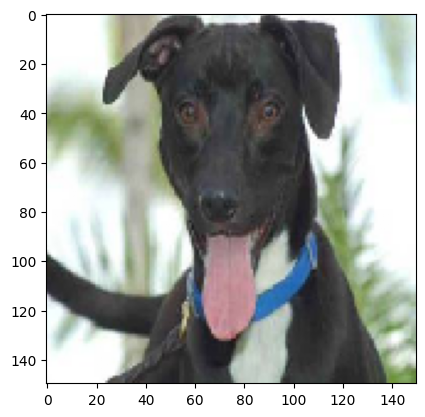

In [4]:
plt.imshow(img_tensor[0])
plt.show()

In [8]:
layer_outputs=[layer.output for layer in model.layers[:8]]
activation_model=models.Model(inputs=model.input,outputs=layer_outputs)

In [10]:
activation=activation_model.predict(img_tensor)
first_activation_layer=activation[0]
print(first_activation_layer.shape)

1/1 [==============================] - 0s 47ms/step
(1, 148, 148, 32)


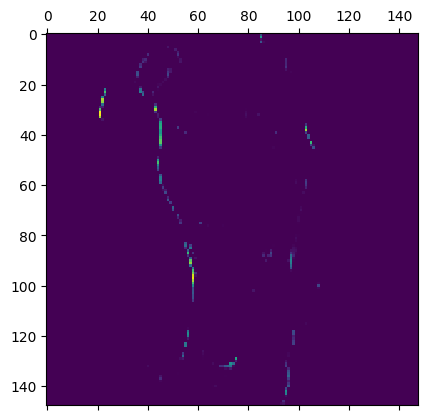

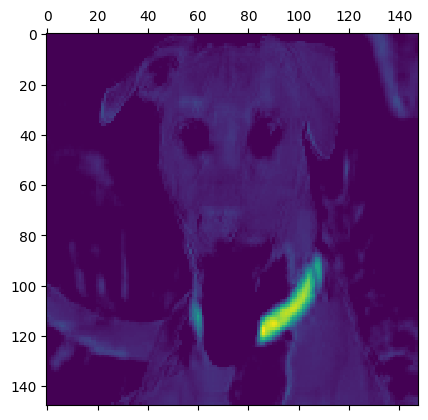

In [11]:
plt.matshow(first_activation_layer[0,:,:,4],cmap='viridis')
plt.matshow(first_activation_layer[0,:,:,7],cmap='viridis')
plt.show()

C:\Users\abuka\AppData\Local\Temp\ipykernel_20880\1297289199.py:23: RuntimeWarning: invalid value encountered in cast
  channel_image=np.clip(channel_image,0,255).astype('uint8')
C:\Users\abuka\AppData\Local\Temp\ipykernel_20880\1297289199.py:20: RuntimeWarning: invalid value encountered in divide
  channel_image/=channel_image.std()


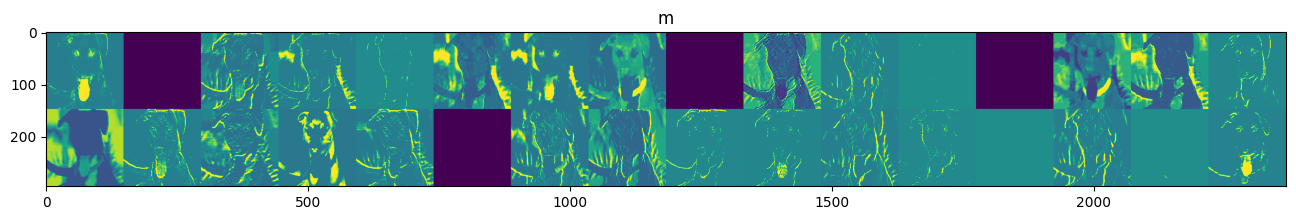

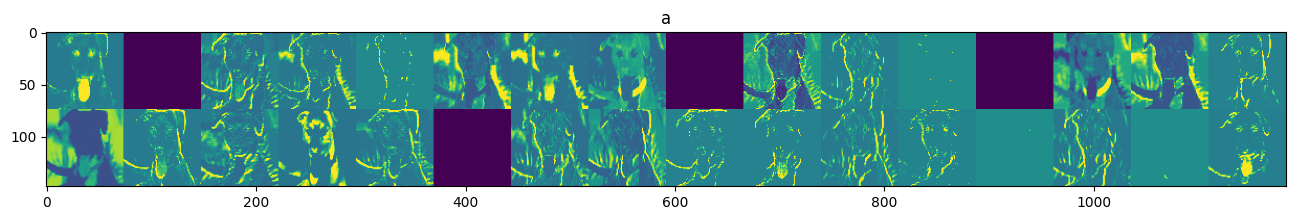

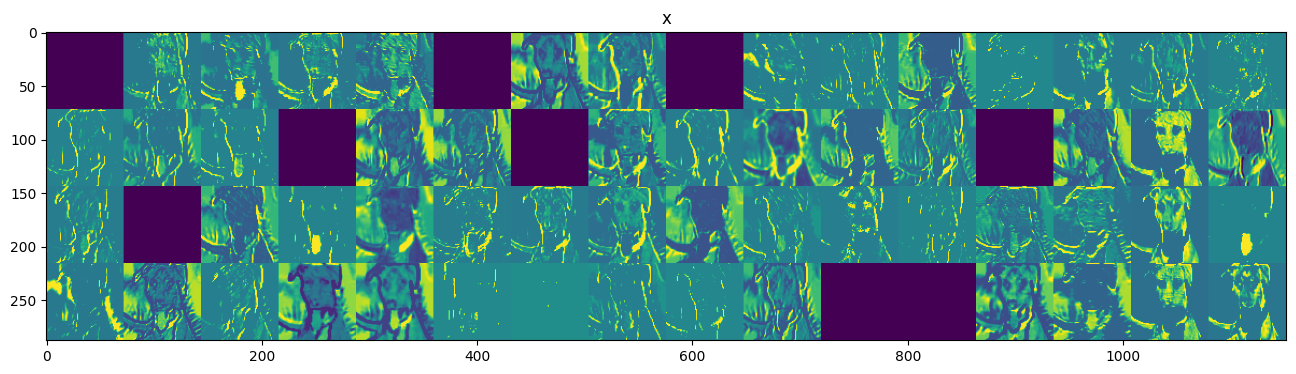

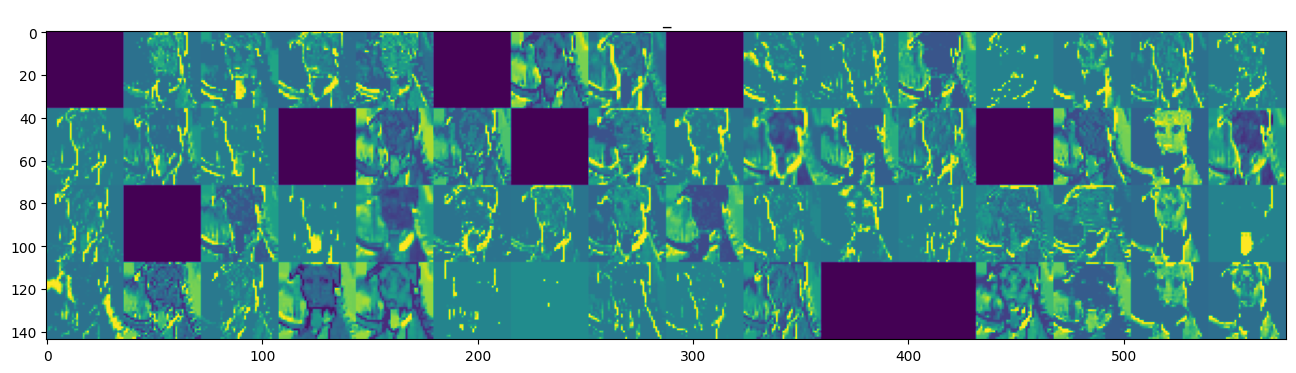

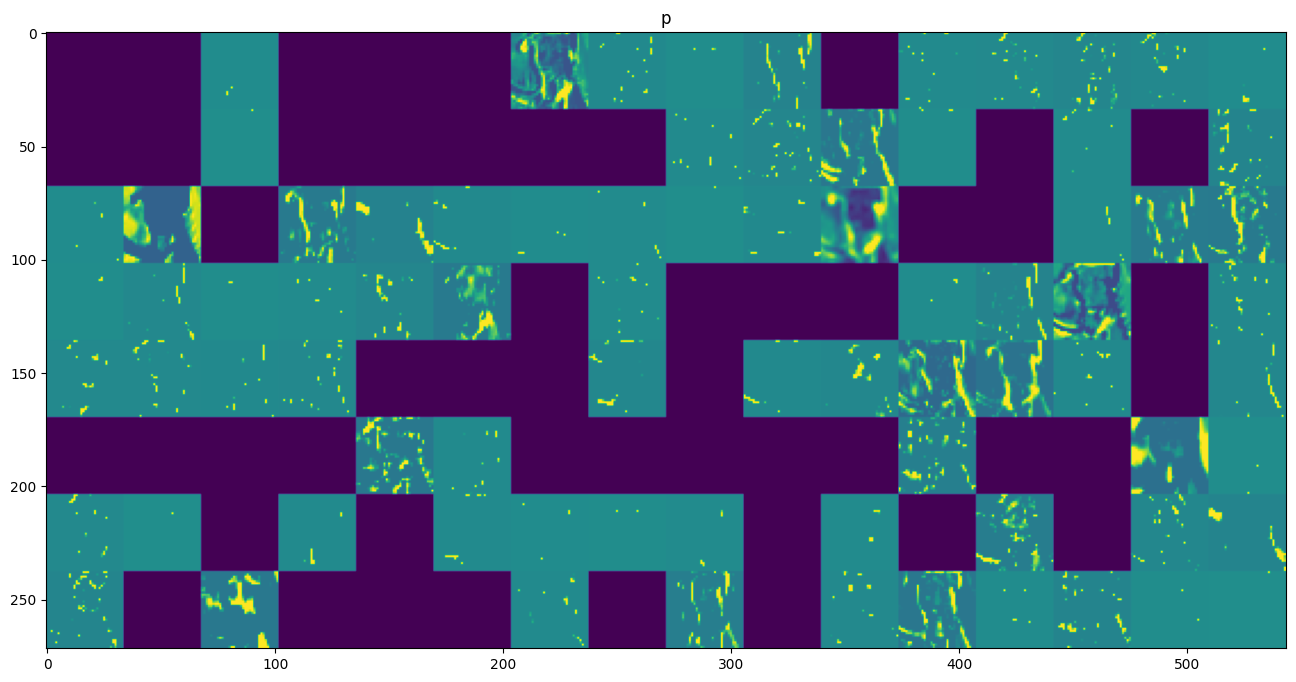

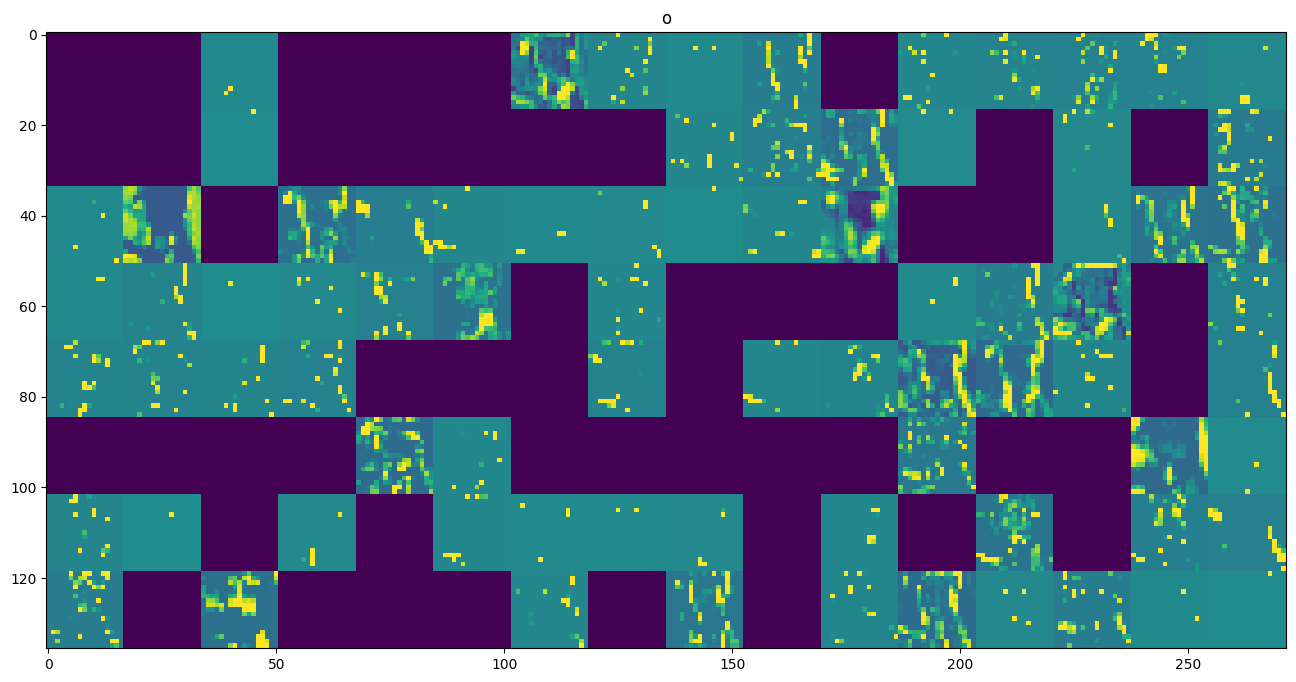

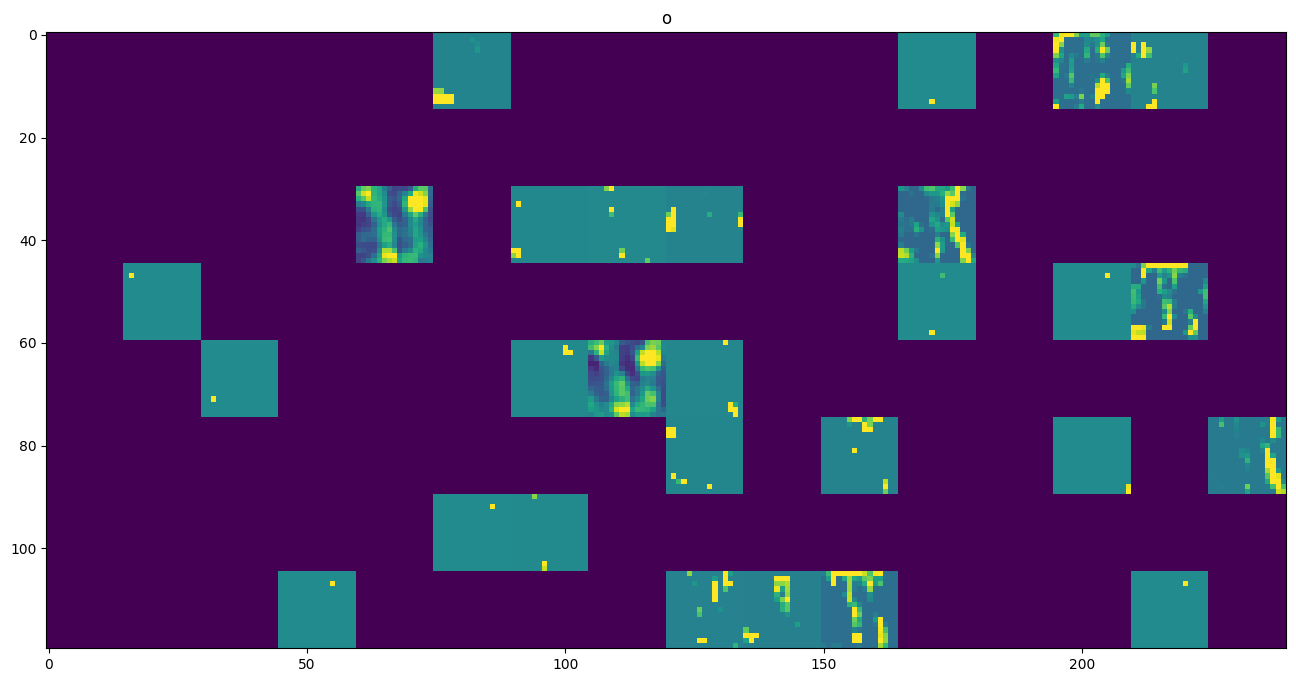

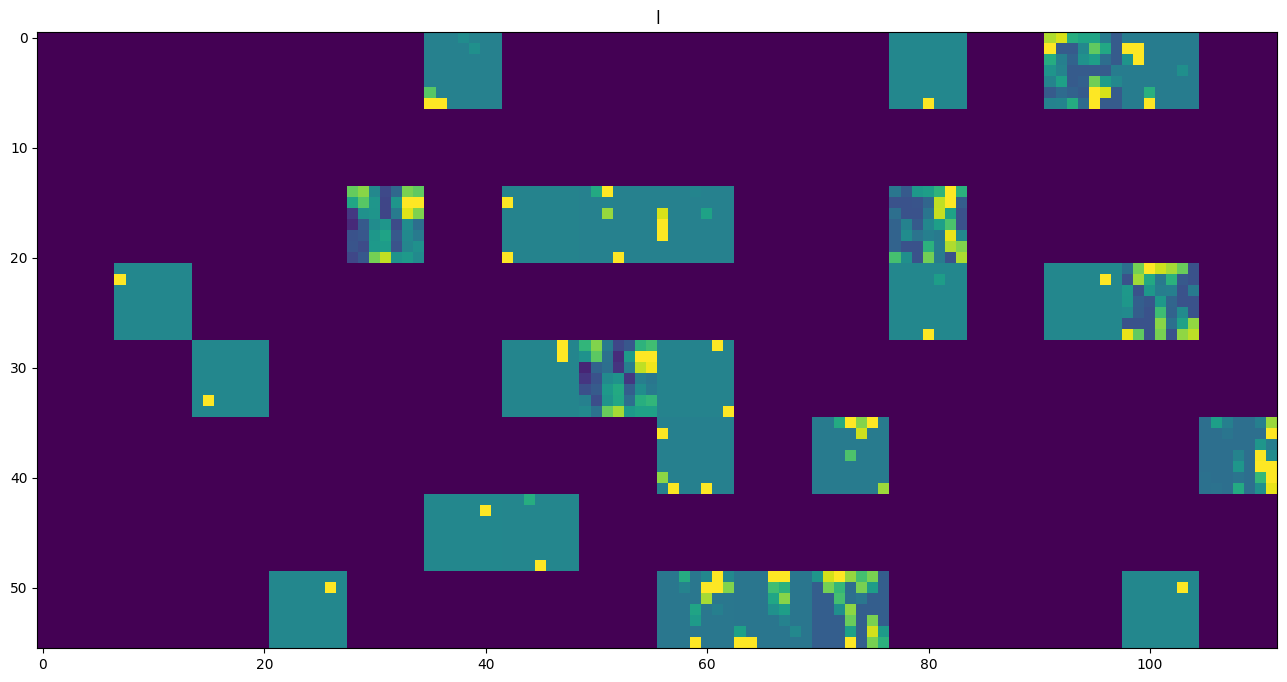

In [16]:
#wszystkie kanały
layer_name=[]
for layer in model.layers[:8]:
    layer_name.append(layer.name)

img_per_row=16

#mapa cech
for layer_name, layer_activation in zip(layer.name,activation):
    n_features=layer_activation.shape[-1]
    size=layer_activation.shape[1]
    n_cols=n_features//img_per_row

    display_grid=np.zeros((size*n_cols, img_per_row*size))

    for col in range(n_cols):
        for row in range(img_per_row):
            channel_image=layer_activation[0,:,:,col*img_per_row+row]
            channel_image-=channel_image.mean()
            channel_image/=channel_image.std()
            channel_image*=64
            channel_image+=128
            channel_image=np.clip(channel_image,0,255).astype('uint8')
            display_grid[col*size:(col+1)*size,row*size:(row+1)*size]=channel_image
    scale=1./size
    plt.figure(figsize=(scale*display_grid.shape[1],scale*display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid,aspect='auto',cmap='viridis')
plt.show()
